In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import os


In [2]:
def select_gpu():
    try:
        if len(tf.config.list_physical_devices('GPU')) > 0:
            # Utiliser with pour créer le contexte
            with tf.device('/device:GPU:0'):
                print("Utilisation du GPU (Metal)")
                return True
        else:
            with tf.device('/CPU:0'):
                print("GPU non disponible. Utilisation du CPU à la place.")
                return False
    except:
        with tf.device('/CPU:0'):
            print("Erreur lors de l'activation du GPU. Utilisation du CPU à la place.")
            return False

select_gpu()

Utilisation du GPU (Metal)


2025-02-07 13:30:59.249048: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2025-02-07 13:30:59.249070: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-02-07 13:30:59.249074: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
I0000 00:00:1738931459.249413  585806 pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
I0000 00:00:1738931459.249694  585806 pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


True

In [15]:
def print_current_device():
    # Obtenir tous les devices disponibles
    devices = tf.config.list_physical_devices()
    print("Devices disponibles:", devices)
    
    # Vérifier le device actuel
    current_device = tf.config.get_visible_devices()
    print("Device actuel:", current_device)
    
    # Vérifier si un GPU est utilisé
    if tf.test.is_built_with_cuda():
        print("TensorFlow est configuré avec CUDA")
    
   # Vérifier les devices visibles (actifs)
    visible_gpus = tf.config.get_visible_devices('GPU')
    if len(visible_gpus) > 0:
        print("GPU/Metal est disponible et activé")
    else:
        print("CPU est utilisé")

print_current_device()

Devices disponibles: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Device actuel: [PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU/Metal est disponible et activé


In [4]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [5]:
# load the dataset
path = os.path.join('..', '..', 'datasets', 'airline-passengers.csv')
dataframe = pd.read_csv(path, usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')


In [6]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [7]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))

96 48


In [8]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [9]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [10]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [11]:
# create LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

/Users/antoine/Documents/GitHub/AntoineMaes/Hardware-for-AI/.venv/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
# Train the model
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100


2025-02-07 13:31:00.609907: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


94/94 - 3s - 33ms/step - loss: 0.0630
Epoch 2/100
94/94 - 1s - 6ms/step - loss: 0.0349
Epoch 3/100
94/94 - 1s - 6ms/step - loss: 0.0253
Epoch 4/100
94/94 - 1s - 6ms/step - loss: 0.0223
Epoch 5/100
94/94 - 1s - 6ms/step - loss: 0.0211
Epoch 6/100
94/94 - 1s - 6ms/step - loss: 0.0202
Epoch 7/100
94/94 - 1s - 6ms/step - loss: 0.0194
Epoch 8/100
94/94 - 1s - 6ms/step - loss: 0.0187
Epoch 9/100
94/94 - 1s - 6ms/step - loss: 0.0180
Epoch 10/100
94/94 - 1s - 6ms/step - loss: 0.0173
Epoch 11/100
94/94 - 1s - 6ms/step - loss: 0.0166
Epoch 12/100
94/94 - 1s - 6ms/step - loss: 0.0159
Epoch 13/100
94/94 - 1s - 6ms/step - loss: 0.0152
Epoch 14/100
94/94 - 1s - 6ms/step - loss: 0.0144
Epoch 15/100
94/94 - 1s - 6ms/step - loss: 0.0137
Epoch 16/100
94/94 - 1s - 6ms/step - loss: 0.0128
Epoch 17/100
94/94 - 1s - 6ms/step - loss: 0.0120
Epoch 18/100
94/94 - 1s - 6ms/step - loss: 0.0110
Epoch 19/100
94/94 - 1s - 6ms/step - loss: 0.0100
Epoch 20/100
94/94 - 1s - 6ms/step - loss: 0.0089
Epoch 21/100
94/94 -

In [13]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
Train Score: 22.76 RMSE
Test Score: 50.09 RMSE


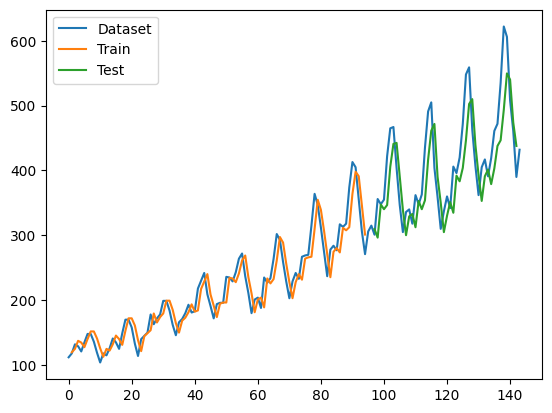

In [14]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label='Dataset')
plt.plot(trainPredictPlot, label='Train')
plt.plot(testPredictPlot, label='Test')
plt.legend()
plt.show()